# Assignment: Creating Graphs for Your Data - Python

Following is the Python program I wrote to fulfill the four assignment of the [Data Management and Visualization online course]( https://www.coursera.org/learn/data-visualization/).

I decided to use [Jupyter Notebook](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb) as it is a pretty way to write code and present results.

## Research question

Using the [Gapminder database](http://www.gapminder.org/), I would like to see if an increasing Internet usage results in an increasing suicide rate. A study shows that other factors like unemployment could have a great impact.

So for this assignment, the three following variables will be analyzed:

- Internet Usage Rate (per 100 people)
- Suicide Rate (per 100 000 people)
- Unemployment Rate (% of the population of age 15+)


## Data management

For the question, I'm interested in the countries for which data are missing will be discarded. As missing data in Gapminder database are replace directly by `NaN` no special data treatment is needed.

In [1]:
# Magic command to insert the graph directly in the notebook
%matplotlib inline
# Load a useful Python libraries for handling data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [2]:
# Read the data
data_filename = r'gapminder.csv'
data = pd.read_csv(data_filename, low_memory=False)
data = data.set_index('country')

General information on the Gapminder data

In [3]:
display(Markdown("Number of countries: {}".format(len(data))))
display(Markdown("Number of variables: {}".format(len(data.columns))))

Number of countries: 213

Number of variables: 15

In [4]:
# Convert interesting variables in numeric format
for variable in ('internetuserate', 'suicideper100th', 'employrate'):
    data[variable] = pd.to_numeric(data[variable], errors='coerce')


But the unemployment rate is not provided directly. In the database, the employment rate (% of the popluation) is available. So the unemployement rate will be computed as `100 - employment rate`:

In [5]:
data['unemployrate'] = 100. - data['employrate']

The first records of the data restricted to the three analyzed variables are:

In [6]:
subdata = data[['internetuserate', 'suicideper100th', 'unemployrate']]
subdata.head(10)

,internetuserate,suicideper100th,unemployrate
country,,,
Afghanistan,3.654122,6.684385,44.299999
Albania,44.989947,7.699330,48.599998
Algeria,12.500073,4.848770,49.500000
Andorra,81.000000,5.362179,NaN
Angola,9.999954,14.554677,24.300003
Antigua and Barbuda,80.645455,2.161843,NaN
Argentina,36.000335,7.765584,41.599998
Armenia,44.001025,3.741588,59.900002
Aruba,41.800889,NaN,NaN


## Data analysis

We will now have a look at the frequencies of the variables after grouping them as all three are continuous variables. I will group the data in intervals using the `cut` function.

### Internet use rate distribution

As the internet use rate is a quantitative variable, the `distplot` of `seaborn` package will be used.

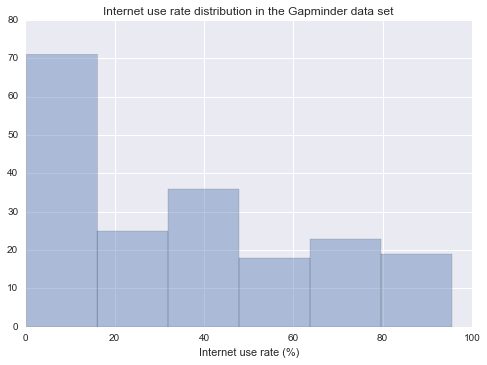

In [7]:
sns.distplot(subdata['internetuserate'].dropna(), kde=False)
plt.xlabel('Internet use rate (%)')
_ = plt.title('Internet use rate distribution in the Gapminder data set')

In [8]:
subdata['internetuserate'].describe()

count    192.000000
mean      35.632716
std       27.780285
min        0.210066
25%        9.999604
50%       31.810121
75%       56.416046
max       95.638113
Name: internetuserate, dtype: float64

From the bar chart and the descriptive information, there is a obvious concentration of countries having less than 20% internet use rate. A quarter of the countries have even 10% or less internet use rate.

The mean is 35.6% with a important standard deviation of 27.8%.

The first mode is about 8%. And there is also a second smaller mode around 40%.

This distribution is bimodal skewed-right.

The distribution range is high; roughly 95%.

#### Example of analysis for a categorical variable

As shown during the last assignement, a categorical variable from the internet use rate can be constructed using the function `cut`.

So to train myself with categorical variable, here follows the same chart and description but for the categorical version of the quantitative variable.

In [9]:
internetuserate_bins = pd.cut(subdata['internetuserate'], 
                              bins=np.linspace(0, 100., num=11))

counts1 = internetuserate_bins.value_counts(sort=False, dropna=False)
percentage1 = internetuserate_bins.value_counts(sort=False, normalize=True, dropna=False)
data_struct = {
    'Counts' : counts1,
    'Cumulative counts' : counts1.cumsum(),
    'Percentages' : percentage1,
    'Cumulative percentages' : percentage1.cumsum()
}

internetrate_summary = pd.DataFrame(data_struct)
internetrate_summary.index.name = 'Internet use rate (per 100 people)'
(internetrate_summary[['Counts', 'Cumulative counts', 'Percentages', 'Cumulative percentages']]
                     .style.set_precision(3)
                           .set_properties(**{'text-align':'right'}))

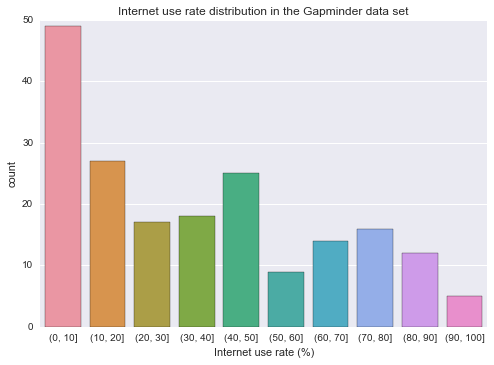

In [10]:
sns.countplot(internetuserate_bins)
plt.xlabel('Internet use rate (%)')
_ = plt.title('Internet use rate distribution in the Gapminder data set')

In [11]:
internetuserate_bins.describe()

count         192
unique         10
top       (0, 10]
freq           49
Name: internetuserate, dtype: object

The conclusions drawn form the quantitative variable are of course confirmed here.

### Suicide per 100,000 people distribution

As the suicide per 100,000 people is a quantitative variable, the `distplot` of `seaborn` package will be used.

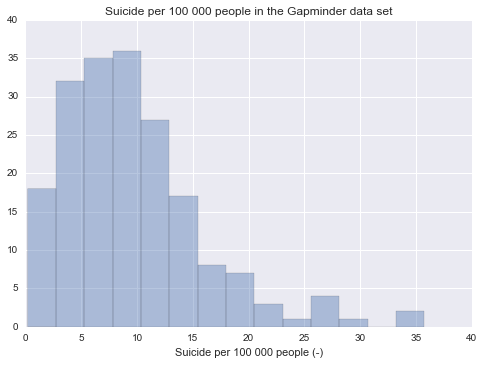

In [12]:
sns.distplot(subdata['suicideper100th'].dropna(), kde=False)
plt.xlabel('Suicide per 100 000 people (-)')
_ = plt.title('Suicide per 100 000 people in the Gapminder data set')

In [13]:
subdata['suicideper100th'].describe()

count    191.000000
mean       9.640839
std        6.300178
min        0.201449
25%        4.988449
50%        8.262893
75%       12.328551
max       35.752872
Name: suicideper100th, dtype: float64

From the bar chart and the descriptive information, 75% of the countries have less than 12 suicide per 100,000 people.

The mean is 9.6 with a standard deviation of 6.3.

This distribution is unimodal and skewed-right.

The distribution range is about 35.

###  Unemployment rate distribution

As the unemployement rate is a quantitative variable, the `distplot` of `seaborn` package will be used.

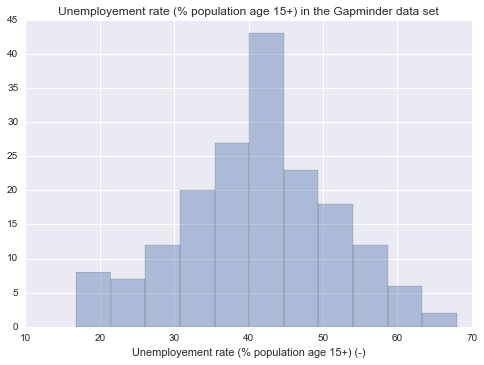

In [14]:
sns.distplot(subdata['unemployrate'].dropna(), kde=False)
plt.xlabel('Unemployement rate (% population age 15+) (-)')
_ = plt.title('Unemployement rate (% population age 15+) in the Gapminder data set')

In [15]:
subdata['unemployrate'].describe()

count    178.000000
mean      41.364045
std       10.519454
min       16.800003
25%       35.025000
50%       41.300001
75%       48.775000
max       68.000000
Name: unemployrate, dtype: float64

There is a clear peak around the mean (~42%).

The mean is 41.4% with a standard deviation of 10.5%.

This distribution is unimodal and symmetric.

The distribution range is roughly 51%.

## Graphing decisions

Now that the univariate distribution as be plotted and described, the bivariate graphics will be plotted in order to test our research hypothesis.

Let's first focus on the primary research question;

- The explanatory variable is the internet use rate (quantitative variable)
- The response variable is the suicide per 100,000 people (quantitative variable)

Due to the variable types, a scatterplot seems to be the graphical solution to apply.

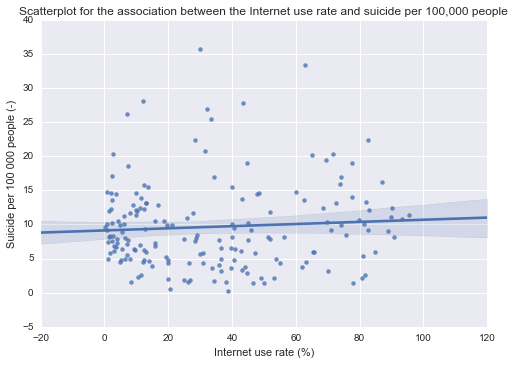

In [16]:
sns.regplot(x='internetuserate', y='suicideper100th', data=subdata)
plt.xlabel('Internet use rate (%)')
plt.ylabel('Suicide per 100 000 people (-)')
_ = plt.title('Scatterplot for the association between the Internet use rate and suicide per 100,000 people')

The regression line is only slightly positive. So it is unclear whether there is a link or not. But as most of the countries have no or very low internet use rate, an effect is maybe seen only on the countries having the higher internet use rate. 

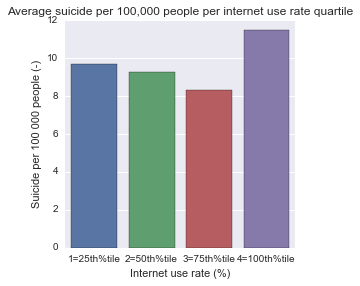

In [17]:
subdata2 = subdata.assign(internet_grp4 = pd.qcut(subdata.internetuserate, 4, 
                                       labels=["1=25th%tile", "2=50th%tile", 
                                               "3=75th%tile", "4=100th%tile"]))
sns.factorplot(x='internet_grp4', y='suicideper100th', data=subdata2, 
               kind="bar", ci=None)
plt.xlabel('Internet use rate (%)')
plt.ylabel('Suicide per 100 000 people (-)')
_ = plt.title('Average suicide per 100,000 people per internet use rate quartile')

By grouping the data in quartile, the hypothesis of an increasing of suicide with internet use rate may be valid only for countries with a heavy use of internet.

It is time to look at the second potential explanatory variable : the unemployment rate. As that variable is quantitative again, the scatterplot will be used.

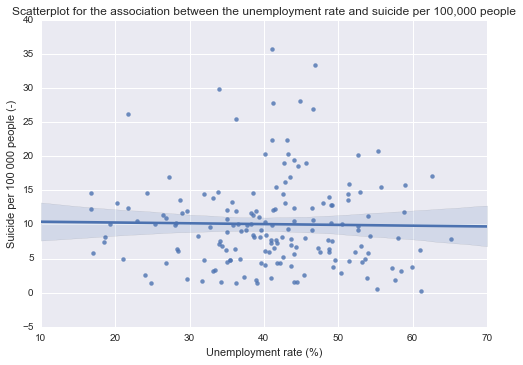

In [18]:
sns.regplot(x='unemployrate', y='suicideper100th', data=subdata)
plt.xlabel('Unemployment rate (%)')
plt.ylabel('Suicide per 100 000 people (-)')
_ = plt.title('Scatterplot for the association between the unemployment rate and suicide per 100,000 people')

It seems there is no correlation between unemployment rate and suicide.

## Summary

The Gapminder data based provides information for 213 countries. 

As the unemployment rate is not provided directly in the database, it was computed as `100 - employment rate`.

The distributions of the variables are as follow:

- Internet Use Rate per 100 people
    * Data missing for 21 countries
    * Rate ranges from 0.21 to 95.64
    * The majority of the countries (64%) have a rate below 50
    * The distribution is bimodal (first mode ~8% and second ~40%) and skewed-right
- Suicide Rate per 100 000
    * Data missing for 22 countries
    * Rate ranges from 0.2 to 35.75
    * The rate is more often between 4 and 12
    * The distribution is unimode (mode ~9) and skewed-right
- Unemployment Rate for age 15+
    * Data missing for 35 countries
    * Rate ranges from 16.8 to 68
    * For the majority of the countries the rate lies below 45
    * The distribution is unimode (mean ~41.4) and symmetric
    
From the bivariate graphics, the internet use rate may have a slight effect on suicide. But if it's the case, it seems only true for countries having an important internet use rate. And the unemployment rate seems to have no influence on suicide. I have to admit those conclusions surprised me as I was a priori thinking that unemployment rate would have a stronger effect on suicide compare to internet use rate.



> If you are interested by the subject, follow me on [Tumblr](http://fcollonval.tumblr.com/).